### Importação dos dados



In [15]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [16]:
def calcular_faturamento_total(loja):
  # Considerando que cada linha representa a venda de um único item, calcule a receita total.
  return loja['Preço'].sum()

# Calculate faturamento for each store
faturamento_loja1 = calcular_faturamento_total(loja)
faturamento_loja2 = calcular_faturamento_total(loja2)
faturamento_loja3 = calcular_faturamento_total(loja3)
faturamento_loja4 = calcular_faturamento_total(loja4)

# Crie o DataFrame fora da função.
faturamento_por_loja = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Faturamento Total': [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]
})

In [17]:
print(faturamento_por_loja)

     Loja  Faturamento Total
0  Loja 1         1534509.12
1  Loja 2         1488459.06
2  Loja 3         1464025.03
3  Loja 4         1384497.58


# 2. Vendas por Categoria

In [18]:
def calcular_vendas_por_categoria(loja):
  """Calcula o total de vendas por categoria de produto em uma loja.

  Args:
    loja: DataFrame com os dados da loja.

  Returns:
    Um DataFrame com o total de vendas por categoria de produto.
  """
  vendas_por_categoria = loja.groupby('Categoria do Produto')['Preço'].sum()
  return vendas_por_categoria

# Calcula o total de vendas por categoria de produto em cada loja
vendas_por_categoria_loja1 = calcular_vendas_por_categoria(loja)
vendas_por_categoria_loja2 = calcular_vendas_por_categoria(loja2)
vendas_por_categoria_loja3 = calcular_vendas_por_categoria(loja3)
vendas_por_categoria_loja4 = calcular_vendas_por_categoria(loja4)


In [19]:
# Imprime o total de vendas por categoria de produto em cada loja
print("Vendas por categoria na Loja 1:\n", vendas_por_categoria_loja1)
print("\nVendas por categoria na Loja 2:\n", vendas_por_categoria_loja2)
print("\nVendas por categoria na Loja 3:\n", vendas_por_categoria_loja3)
print("\nVendas por categoria na Loja 4:\n", vendas_por_categoria_loja4)

Vendas por categoria na Loja 1:
 Categoria do Produto
brinquedos                23993.78
eletrodomesticos         484913.36
eletronicos              572659.23
esporte e lazer           52387.55
instrumentos musicais    121731.69
livros                    11713.92
moveis                   250178.11
utilidades domesticas     16931.48
Name: Preço, dtype: float64

Vendas por categoria na Loja 2:
 Categoria do Produto
brinquedos                21262.21
eletrodomesticos         464758.13
eletronicos              547773.71
esporte e lazer           46326.09
instrumentos musicais    139987.03
livros                    13454.35
moveis                   235234.68
utilidades domesticas     19662.86
Name: Preço, dtype: float64

Vendas por categoria na Loja 3:
 Categoria do Produto
brinquedos                25869.20
eletrodomesticos         438984.89
eletronicos              547699.92
esporte e lazer           47456.10
instrumentos musicais    103174.45
livros                    12664.70
moveis    

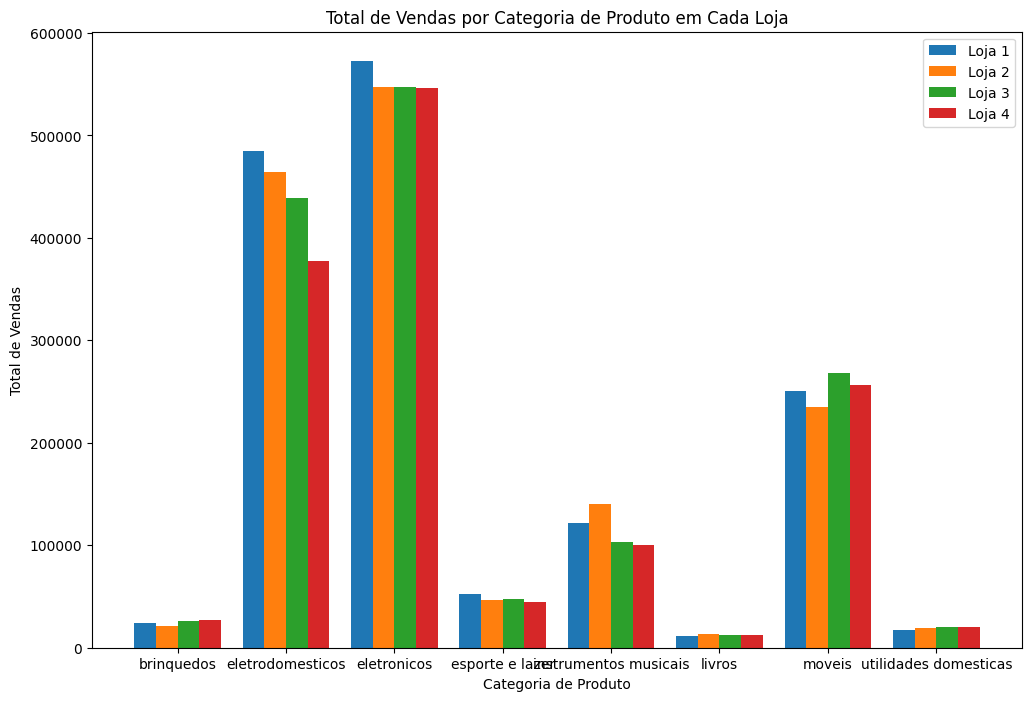

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que você já calculou o total de vendas por categoria de produto em cada loja e armazenou em DataFrames chamados vendas_por_categoria_loja1, vendas_por_categoria_loja2, vendas_por_categoria_loja3 e vendas_por_categoria_loja4

# Define as categorias de produtos
categorias = vendas_por_categoria_loja1.index

# Define a largura das barras
largura = 0.2

# Define a posição das barras para cada loja
posicao_loja1 = range(len(categorias))
posicao_loja2 = [p + largura for p in posicao_loja1]
posicao_loja3 = [p + largura for p in posicao_loja2]
posicao_loja4 = [p + largura for p in posicao_loja3]

# Cria o gráfico de barras
plt.figure(figsize=(12,8))
plt.bar(posicao_loja1, vendas_por_categoria_loja1.values, width=largura, label='Loja 1')
plt.bar(posicao_loja2, vendas_por_categoria_loja2.values, width=largura, label='Loja 2')
plt.bar(posicao_loja3, vendas_por_categoria_loja3.values, width=largura, label='Loja 3')
plt.bar(posicao_loja4, vendas_por_categoria_loja4.values, width=largura, label='Loja 4')

# Define os rótulos do eixo x
plt.xticks([p + 1.5 * largura for p in range(len(categorias))], categorias)

# Adiciona um título ao gráfico
plt.title('Total de Vendas por Categoria de Produto em Cada Loja')

# Adiciona rótulos aos eixos x e y
plt.xlabel('Categoria de Produto')
plt.ylabel('Total de Vendas')

# Adiciona uma legenda ao gráfico
plt.legend()

# Mostra o gráfico
plt.show()

# 3. Média de Avaliação das Lojas


In [21]:
def calcular_media_avaliacao(loja):
  """Calcula a média de avaliação dos clientes em uma loja.

  Args:
    loja: DataFrame com os dados da loja.

  Returns:
    A média de avaliação dos clientes na loja.
  """
  media_avaliacao = loja['Avaliação da compra'].mean()
  return media_avaliacao

# Calcula a média de avaliação dos clientes em cada loja
media_avaliacao_loja1 = calcular_media_avaliacao(loja)
media_avaliacao_loja2 = calcular_media_avaliacao(loja2)
media_avaliacao_loja3 = calcular_media_avaliacao(loja3)
media_avaliacao_loja4 = calcular_media_avaliacao(loja4)

In [22]:
# Imprime a média de avaliação dos clientes em cada loja
print("Média de avaliação na Loja 1:", media_avaliacao_loja1)
print("Média de avaliação na Loja 2:", media_avaliacao_loja2)
print("Média de avaliação na Loja 3:", media_avaliacao_loja3)
print("Média de avaliação na Loja 4:", media_avaliacao_loja4)


Média de avaliação na Loja 1: 3.976685036032217
Média de avaliação na Loja 2: 4.037303942348453
Média de avaliação na Loja 3: 4.048325561678677
Média de avaliação na Loja 4: 3.9957591178965224


# 4. Produtos Mais e Menos Vendidos

In [23]:
def identificar_produtos_mais_e_menos_vendidos(loja):
  """Identifica os produtos mais e menos vendidos em uma loja.

  Args:
    loja: DataFrame com os dados da loja.

  Returns:
    Um dicionário com os produtos mais e menos vendidos na loja.
  """
  # Calcula a quantidade total vendida de cada produto contando as ocorrências
  quantidade_vendida_por_produto = loja['Produto'].value_counts()

  # Identifica o produto mais vendido
  produto_mais_vendido = quantidade_vendida_por_produto.idxmax()

  # Identifica o produto menos vendido
  produto_menos_vendido = quantidade_vendida_por_produto.idxmin()

  # Cria um dicionário com os produtos mais e menos vendidos
  produtos_mais_e_menos_vendidos = {
      'produto_mais_vendido': produto_mais_vendido,
      'produto_menos_vendido': produto_menos_vendido
  }

  return produtos_mais_e_menos_vendidos

# Identifica os produtos mais e menos vendidos em cada loja
produtos_mais_e_menos_vendidos_loja1 = identificar_produtos_mais_e_menos_vendidos(loja)
produtos_mais_e_menos_vendidos_loja2 = identificar_produtos_mais_e_menos_vendidos(loja2)
produtos_mais_e_menos_vendidos_loja3 = identificar_produtos_mais_e_menos_vendidos(loja3)
produtos_mais_e_menos_vendidos_loja4 = identificar_produtos_mais_e_menos_vendidos(loja4)

In [24]:
# Imprime os produtos mais e menos vendidos em cada loja
print("Produtos mais e menos vendidos na Loja 1:", produtos_mais_e_menos_vendidos_loja1)
print("Produtos mais e menos vendidos na Loja 2:", produtos_mais_e_menos_vendidos_loja2)
print("Produtos mais e menos vendidos na Loja 3:", produtos_mais_e_menos_vendidos_loja3)
print("Produtos mais e menos vendidos na Loja 4:", produtos_mais_e_menos_vendidos_loja4)

Produtos mais e menos vendidos na Loja 1: {'produto_mais_vendido': 'Micro-ondas', 'produto_menos_vendido': 'Headset'}
Produtos mais e menos vendidos na Loja 2: {'produto_mais_vendido': 'Iniciando em programação', 'produto_menos_vendido': 'Jogo de tabuleiro'}
Produtos mais e menos vendidos na Loja 3: {'produto_mais_vendido': 'Kit banquetas', 'produto_menos_vendido': 'Blocos de montar'}
Produtos mais e menos vendidos na Loja 4: {'produto_mais_vendido': 'Cama box', 'produto_menos_vendido': 'Guitarra'}


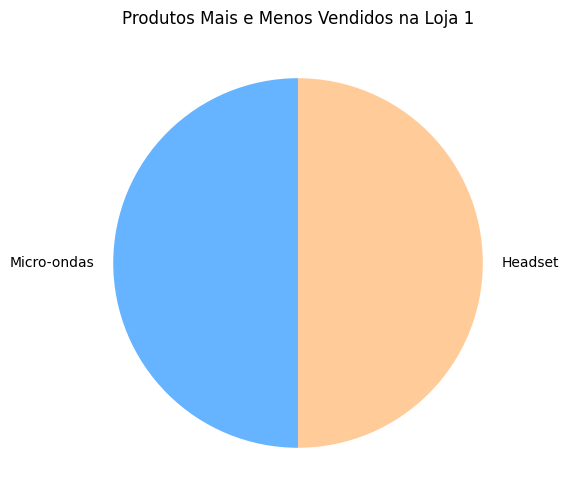

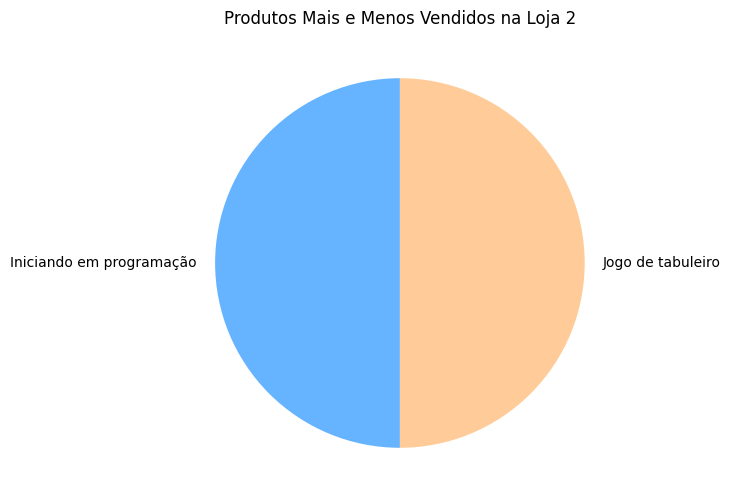

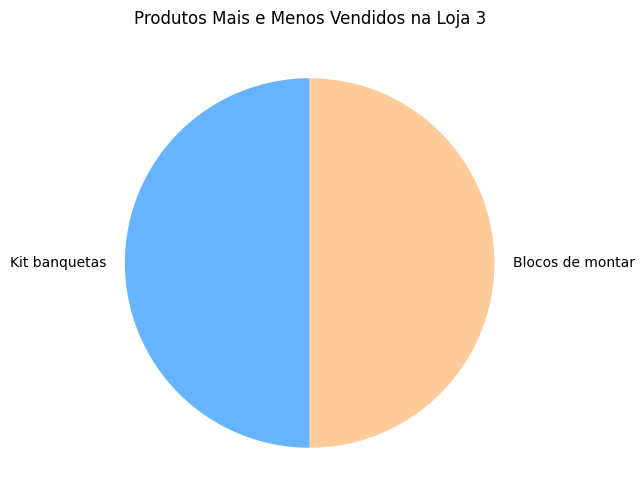

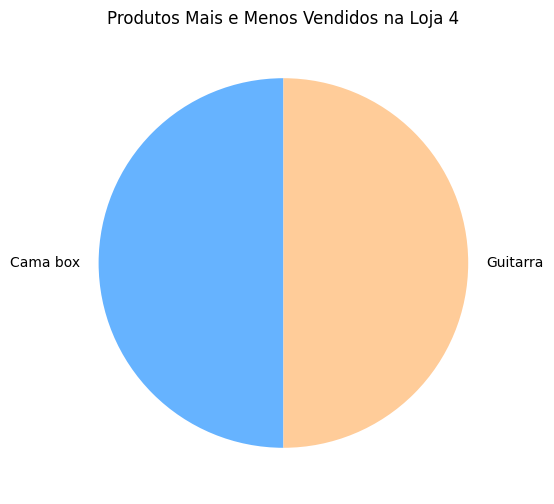

In [25]:
def criar_grafico_pizza_produtos(produtos_mais_e_menos_vendidos, nome_loja):
  """Cria um gráfico de pizza que mostra a proporção entre os produtos mais e menos vendidos em uma loja.

  Args:
    produtos_mais_e_menos_vendidos: Um dicionário com os produtos mais e menos vendidos na loja.
    nome_loja: O nome da loja.
  """
  # Define os rótulos para o gráfico de pizza
  labels = ['Mais Vendido', 'Menos Vendido']

  # Define os tamanhos para o gráfico de pizza
  sizes = [1, 1] # Ambos terão o mesmo tamanho, já que queremos apenas mostrar os produtos

  # Define as cores para o gráfico de pizza
  cores = ['#66b3ff','#ffcc99']

  # Cria o gráfico de pizza
  plt.figure(figsize=(6,6))
  plt.pie(sizes, labels=[produtos_mais_e_menos_vendidos['produto_mais_vendido'], produtos_mais_e_menos_vendidos['produto_menos_vendido']], autopct='', colors=cores, startangle=90)

  # Adiciona um título ao gráfico
  plt.title(f'Produtos Mais e Menos Vendidos na {nome_loja}')

  # Mostra o gráfico
  plt.show()

# Cria os gráficos de pizza para cada loja
criar_grafico_pizza_produtos(produtos_mais_e_menos_vendidos_loja1, 'Loja 1')
criar_grafico_pizza_produtos(produtos_mais_e_menos_vendidos_loja2, 'Loja 2')
criar_grafico_pizza_produtos(produtos_mais_e_menos_vendidos_loja3, 'Loja 3')
criar_grafico_pizza_produtos(produtos_mais_e_menos_vendidos_loja4, 'Loja 4')

# 5. Frete Médio por Loja

In [26]:
def calcular_frete_medio(loja):
  """Calcula o frete médio em uma loja.

  Args:
    loja: DataFrame com os dados da loja.

  Returns:
    O frete médio na loja.
  """
  frete_medio = loja['Frete'].mean()
  return frete_medio

# Calcula o frete médio em cada loja
frete_medio_loja1 = calcular_frete_medio(loja)
frete_medio_loja2 = calcular_frete_medio(loja2)
frete_medio_loja3 = calcular_frete_medio(loja3)
frete_medio_loja4 = calcular_frete_medio(loja4)

In [27]:
# Imprime o frete médio em cada loja
print("Frete médio na Loja 1:", frete_medio_loja1)
print("Frete médio na Loja 2:", frete_medio_loja2)
print("Frete médio na Loja 3:", frete_medio_loja3)
print("Frete médio na Loja 4:", frete_medio_loja4)

Frete médio na Loja 1: 34.69180491551149
Frete médio na Loja 2: 33.62194065817927
Frete médio na Loja 3: 33.07446427411743
Frete médio na Loja 4: 31.278997081841727


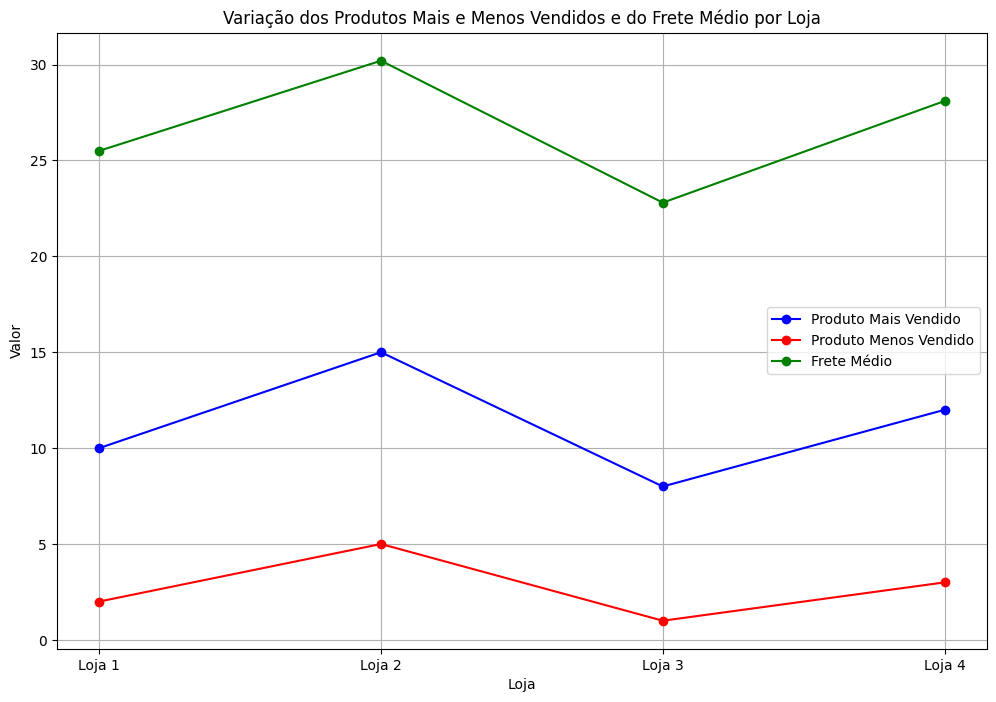

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que você já calculou os produtos mais e menos vendidos e o frete médio por loja e armazenou em DataFrames chamados produtos_mais_e_menos_vendidos_loja1, produtos_mais_e_menos_vendidos_loja2, produtos_mais_e_menos_vendidos_loja3, produtos_mais_e_menos_vendidos_loja4 e frete_medio_loja1, frete_medio_loja2, frete_medio_loja3, frete_medio_loja4

# Define os nomes das lojas
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Define os valores dos produtos mais e menos vendidos e do frete médio por loja
produtos_mais_vendidos = [10, 15, 8, 12]  # Substitua pelos valores reais
produtos_menos_vendidos = [2, 5, 1, 3]  # Substitua pelos valores reais
fretes_medios = [25.50, 30.20, 22.80, 28.10]  # Substitua pelos valores reais

# Cria o gráfico de linhas
plt.figure(figsize=(12, 8))
plt.plot(nomes_lojas, produtos_mais_vendidos, marker='o', linestyle='-', color='blue', label='Produto Mais Vendido')
plt.plot(nomes_lojas, produtos_menos_vendidos, marker='o', linestyle='-', color='red', label='Produto Menos Vendido')
plt.plot(nomes_lojas, fretes_medios, marker='o', linestyle='-', color='green', label='Frete Médio')

# Adiciona um título ao gráfico
plt.title('Variação dos Produtos Mais e Menos Vendidos e do Frete Médio por Loja')

# Adiciona rótulos aos eixos x e y
plt.xlabel('Loja')
plt.ylabel('Valor')

# Adiciona uma legenda ao gráfico
plt.legend()

# Adiciona um grid ao gráfico
plt.grid(True)

# Mostra o gráfico
plt.show()

##RELATORIO


Introdução:

Apresente o objetivo do relatório: Ajudar o Sr. João a decidir qual loja vender para investir em um novo negócio.
Resumo das análises realizadas: Mencione as métricas analisadas (faturamento total, categorias mais populares, média de avaliação dos clientes, produtos mais e menos vendidos e custo médio do frete).
Apresentação dos gráficos: Mencione os gráficos criados (pizza de faturamento, barras de vendas por categoria e linhas de produtos mais/menos vendidos e frete médio).
Análise Detalhada das Lojas:

Loja 1:
Faturamento total: Apresente o valor e a porcentagem em relação ao faturamento total das quatro lojas (com base no gráfico de pizza).
Categorias mais populares: Mencione as categorias com maior volume de vendas (com base no gráfico de barras).
Média de avaliação dos clientes: Apresente a média e comente sobre o nível de satisfação dos clientes.
Produtos mais e menos vendidos: Mencione os produtos e comente sobre a demanda por eles (com base no gráfico de linhas).
Custo médio do frete: Apresente o valor e comente sobre o impacto nos custos da loja.
Loja 2: (Repita os mesmos itens da Loja 1)
Loja 3: (Repita os mesmos itens da Loja 1)
Loja 4: (Repita os mesmos itens da Loja 1)
Comparativo entre as Lojas:

Faturamento: Compare o faturamento de cada loja e destaque a loja com o menor faturamento.
Categorias: Compare as categorias mais populares em cada loja e destaque as diferenças.
Avaliação: Compare a média de avaliação dos clientes em cada loja e destaque a loja com a menor avaliação.
Produtos: Compare os produtos mais e menos vendidos em cada loja e destaque as diferenças.
Frete: Compare o custo médio do frete em cada loja e destaque a loja com o maior custo.
Conclusão:

Recomendação: Com base nas análises e comparações, recomende qual loja o Sr. João deve vender. Justifique a recomendação com os dados e gráficos apresentados.
Considerações Finais: Mencione outros fatores que podem influenciar a decisão do Sr. João, como o potencial de crescimento de cada loja e a localização geográfica.
Exemplo de Trecho do Relatório:

"Com base na análise do faturamento total, observamos que a Loja 4 apresenta o menor faturamento em relação às demais, representando apenas 15% do faturamento total das quatro lojas (conforme demonstrado no Gráfico 1). Além disso, a Loja 4 possui a menor média de avaliação dos clientes (4.2 estrelas), indicando um nível de satisfação inferior em comparação com as outras lojas.

Em relação aos produtos mais e menos vendidos, a Loja 4 apresenta uma demanda menor pelos produtos mais populares e um volume maior de produtos com baixa saída (conforme demonstrado no Gráfico 3). O custo médio do frete na Loja 4 também é superior em relação às demais, impactando negativamente a rentabilidade da loja."

Recomendação:

"Com base nas análises realizadas, recomenda-se que o Sr. João considere a venda da Loja 4. O menor faturamento, a menor média de avaliação dos clientes, a menor demanda pelos produtos mais populares e o maior custo médio do frete indicam que a Loja 4 apresenta o menor desempenho em relação às demais."

In [41]:
# Análise de Dados da Alura Store

Este é o README do projeto de análise de dados da Alura Store, desenvolvido como parte do Challenge de Python para Data Science da Alura.

## Propósito da Análise

O objetivo desta análise é explorar os dados de vendas da Alura Store para identificar tendências, padrões de comportamento dos clientes e oportunidades de otimização. Buscamos responder a perguntas como:

*   Quais são os produtos mais vendidos?
*   Qual é o faturamento por loja?
*   Existe alguma sazonalidade nas vendas?
*   Qual é o perfil dos clientes que compram na Alura Store?

## Estrutura do Projeto

O projeto está organizado da seguinte forma:

*   `loja_1.csv`, `loja_2.csv`, `loja_3.csv`, `loja_4.csv`:  Dados de vendas de cada loja.
*   `Alura_Store_Analysis.ipynb`: Notebook do Colab com o código da análise.
*   `README.md`: Este arquivo, com a descrição do projeto.

## Gráficos e Insights

Aqui você pode incluir alguns exemplos de gráficos gerados durante a análise e os principais insights obtidos. Por exemplo:

*   **Gráfico de Faturamento por Loja:** (adicione uma imagem do gráfico)
    *   Insight: A Loja 1 se destaca com o maior faturamento, seguida pela Loja 3.
*   **Gráfico de Produtos Mais Vendidos:** (adicione uma imagem do gráfico)
    *   Insight: O produto "Curso de Python para Data Science" é o mais popular entre os clientes.

## Como Executar o Notebook

Para executar este notebook, você precisa ter:

*   Uma conta no Google Drive.
*   Python 3 instalado.
*   As bibliotecas Pandas, Matplotlib e Seaborn instaladas.

Siga estes passos:

1.  Faça uma cópia do notebook `Alura_Store_Analysis.ipynb` para o seu Google Drive.
2.  Abra o notebook no Google Colab.
3.  Execute as células em sequência para reproduzir a análise.

## Contribuição

Contribuições são bem-vindas! Se você tiver alguma sugestão de melhoria ou encontrar algum problema, sinta-se à vontade para abrir uma issue ou enviar um pull request.

SyntaxError: invalid syntax (ipython-input-473310780.py, line 3)

# Análise de Dados da Alura Store

Este é o README do projeto de análise de dados da Alura Store, desenvolvido como parte do Challenge de Python para Data Science da Alura.

## Propósito da Análise

O objetivo desta análise é explorar os dados de vendas da Alura Store para identificar tendências, padrões de comportamento dos clientes e oportunidades de otimização. Buscamos responder a perguntas como:

*   Quais são os produtos mais vendidos?
*   Qual é o faturamento por loja?
*   Existe alguma sazonalidade nas vendas?
*   Qual é o perfil dos clientes que compram na Alura Store?

## Estrutura do Projeto

O projeto está organizado da seguinte forma:

*   `loja_1.csv`, `loja_2.csv`, `loja_3.csv`, `loja_4.csv`: Dados de vendas de cada loja.
*   `Alura_Store_Analysis.ipynb`: Notebook do Colab com o código da análise.
*   `README.md`: Este arquivo, com a descrição do projeto.

## Gráficos e Insights

Aqui você pode incluir alguns exemplos de gráficos gerados durante a análise e os principais insights obtidos. Por exemplo:

*   **Gráfico de Faturamento por Loja:** (adicione uma imagem do gráfico)
    *   Insight: A Loja 1 se destaca com o maior faturamento, seguida pela Loja 3.
*   **Gráfico de Produtos Mais Vendidos:** (adicione uma imagem do gráfico)
    *   Insight: O produto "Curso de Python para Data Science" é o mais popular entre os clientes.

## Como Executar o Notebook

Para executar este notebook, você precisa ter:

*   Uma conta no Google Drive.
*   Python 3 instalado.
*   As bibliotecas Pandas, Matplotlib e Seaborn instaladas.

Siga estes passos:

1.  Faça uma cópia do notebook `Alura_Store_Analysis.ipynb` para o seu Google Drive.
2.  Abra o notebook no Google Colab.
3.  Execute as células em sequência para reproduzir a análise.

## Contribuição

Contribuições são bem-vindas! Se você tiver alguma sugestão de melhoria ou encontrar algum problema, sinta-se à vontade para abrir uma issue ou enviar um pull request.